In [12]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
def load(filepath):
    # Load text file
    with open(filepath, "r") as file:
        text = file.read()

    # Extract homophily and alpha
    homophily = float(re.search(r'Dataset Inter Homophily:([\d.]+)', text).group(1))
    alpha = float(re.search(r"'ALPHA': ([\d.]+)", text).group(1))

    # Define regex pattern for each model
    # model_pattern = r"""
    # (?P<model_name>Temporal\sMultiFix(?:\sDeepwalk)?|Multi-Label\sEvolve\sGCN):\s+
    # train-loss:(?P<train_loss_mean>[-+]?\d*\.\d+)\+-[\d.]+\s+
    # test-loss:(?P<test_loss_mean>[-+]?\d*\.\d+)\+-[\d.]+\s+
    # test-f1-macro:(?P<f1_macro>[-+]?\d*\.\d+)\+-[\d.]+\s+
    # test-f1-micro:(?P<f1_micro>[-+]?\d*\.\d+)\+-[\d.]+\s+
    # test-AP-macro:(?P<ap_macro>[-+]?\d*\.\d+)\+-[\d.]+\s+
    # test-AUC-ROC:(?P<auc_roc>[-+]?\d*\.\d+)\+-[\d.]+
    # """

    model_pattern = r"""
    (?P<model_name>Temporal\sMultiFix(?:\sDeepwalk)?|Multi-Label\sEvolve\sGCN):\s+
    train-loss:(?P<train_loss_mean>[-+]?\d*\.\d+)\+\-(?P<train_loss_std>[\d.]+)\s+
    test-loss:(?P<test_loss_mean>[-+]?\d*\.\d+)\+\-(?P<test_loss_std>[\d.]+)\s+
    test-f1-macro:(?P<f1_macro_mean>[-+]?\d*\.\d+)\+\-(?P<f1_macro_std>[\d.]+)\s+
    test-f1-micro:(?P<f1_micro_mean>[-+]?\d*\.\d+)\+\-(?P<f1_micro_std>[\d.]+)\s+
    test-AP-macro:(?P<ap_macro_mean>[-+]?\d*\.\d+)\+\-(?P<ap_macro_std>[\d.]+)\s+
    test-AUC-ROC:(?P<auc_roc_mean>[-+]?\d*\.\d+)\+\-(?P<auc_roc_std>[\d.]+)
    """

    # Apply regex
    matches = re.finditer(model_pattern, text, re.VERBOSE)

    # Extract and build dataframe
    data = []
    for match in matches:
        result = match.groupdict()
        result["homophily"] = homophily
        result["alpha"] = alpha
        data.append(result)

    df = pd.DataFrame(data)

    # Convert all columns except 'model_name' to float
    for col in df.columns:
        if col != "model_name":
            df[col] = df[col].astype(float)
        
    return df

In [47]:
filepaths = ['data\\results_alpha0_2025-06-12_08-13-31.txt',
             'data\\results_alpha0.5_2025-06-12_17-13-09.txt',
            'data\\results_alpha1_2025-06-12_06-21-41.txt',
            'data\\results_alpha1.5_2025-06-12_18-07-06.txt',
            'data\\results_alpha2_2025-06-12_05-23-19.txt',
            'data\\results_alpha2.5_2025-06-12_18-50-26.txt',
            'data\\results_alpha3_2025-06-12_04-40-54.txt',
            'data\\results_alpha4_2025-06-12_04-02-38.txt',
            'data\\results_alpha5_2025-06-12_03-25-48.txt',
            'data\\results_alpha6_2025-06-12_11-53-43.txt',
            'data\\results_alpha7_2025-06-12_12-29-45.txt',
            'data\\results_alpha8_2025-06-12_13-06-04.txt',
            'data\\results_alpha9_2025-06-12_13-42-07.txt',
            'data\\results_alpha10_2025-06-12_14-21-58.txt'
            ]

df = pd.concat([load(filepath) for filepath in filepaths], axis=0)
df


,model_name,train_loss_mean,train_loss_std,test_loss_mean,test_loss_std,f1_macro_mean,f1_macro_std,f1_micro_mean,f1_micro_std,ap_macro_mean,ap_macro_std,auc_roc_mean,auc_roc_std,homophily,alpha
0,Temporal MultiFix,0.0831,0.0206,0.0807,0.0221,0.7872,0.0378,0.9683,0.0135,0.7636,0.0403,0.8833,0.0194,0.3704,0.0
1,Temporal MultiFix Deepwalk,261.8790,521.9761,88.2357,175.0149,0.6553,0.1372,0.8871,0.0877,0.6340,0.1365,0.7737,0.1149,0.3704,0.0
2,Multi-Label Evolve GCN,0.0982,0.0029,0.0979,0.0030,0.7745,0.0040,0.9540,0.0017,0.7466,0.0029,0.8653,0.0025,0.3704,0.0
0,Temporal MultiFix,0.1852,0.2084,0.2175,0.2727,0.7533,0.0788,0.9395,0.0583,0.7303,0.0750,0.8587,0.0516,0.5003,0.5
1,Temporal MultiFix Deepwalk,3.8790,3.4676,4.5993,3.7786,0.5859,0.0960,0.8084,0.0860,0.5469,0.0978,0.6988,0.0952,0.5003,0.5
2,Multi-Label Evolve GCN,0.1040,0.0046,0.1027,0.0052,0.7743,0.0035,0.9511,0.0033,0.7444,0.0040,0.8637,0.0029,0.5003,0.5
0,Temporal MultiFix,2.6647,4.2061,1.7780,2.4201,0.6392,0.0867,0.8815,0.0705,0.6228,0.0855,0.7758,0.0699,0.6146,1.0
1,Temporal MultiFix Deepwalk,0.0759,0.0196,0.0930,0.0275,0.7660,0.0511,0.9580,0.0146,0.7349,0.0522,0.8616,0.0311,0.6146,1.0
2,Multi-Label Evolve GCN,0.1087,0.0052,0.1088,0.0052,0.7684,0.0046,0.9478,0.0032,0.7384,0.0054,0.8593,0.0035,0.6146,1.0
0,Temporal MultiFix,0.8385,1.5057,0.6512,1.1354,0.7448,0.0952,0.9309,0.0679,0.7128,0.1005,0.8449,0.0672,0.7056,1.5


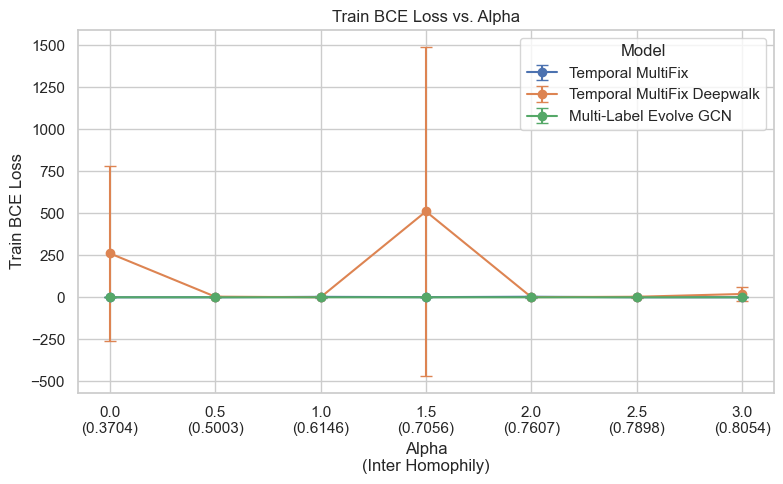

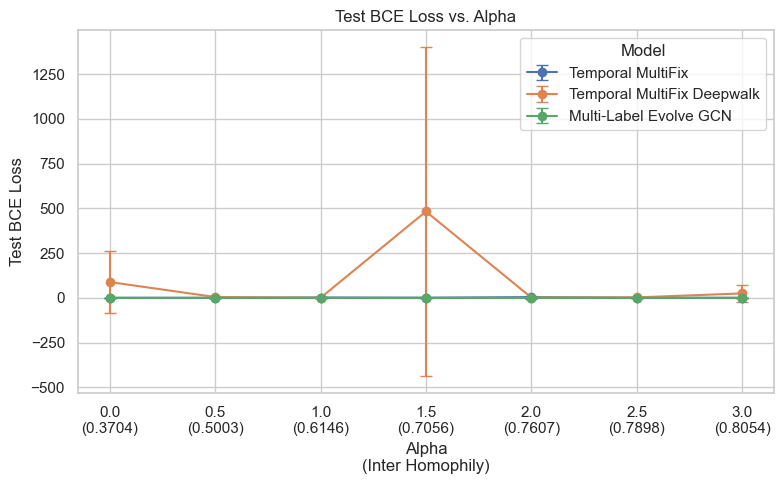

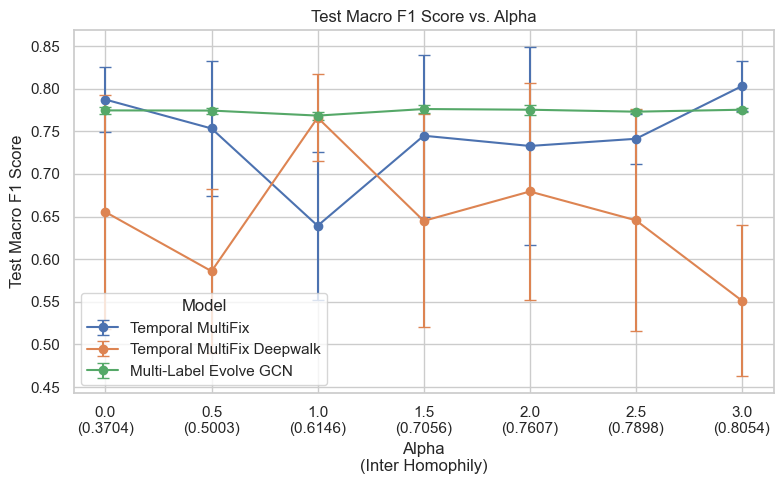

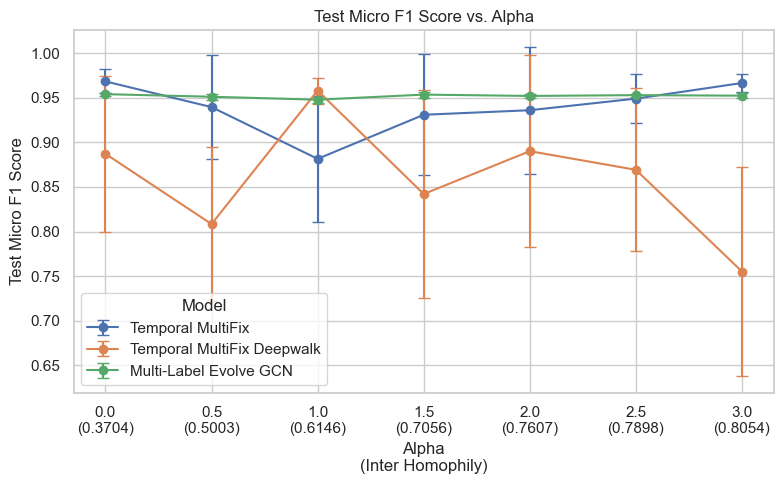

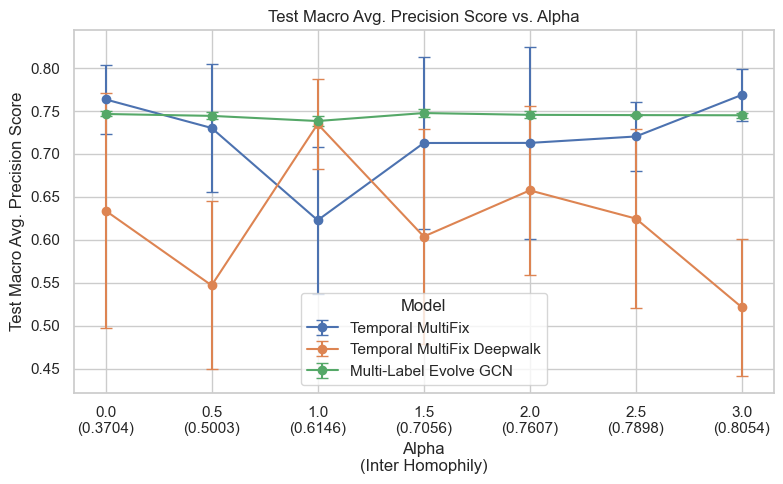

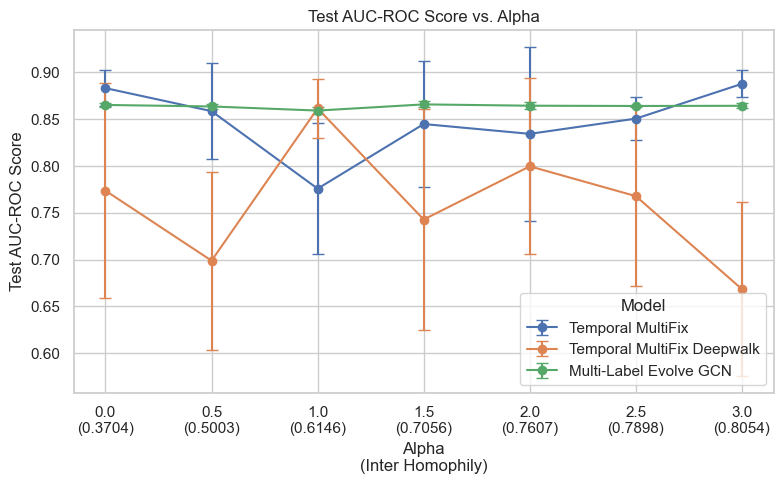

In [52]:
metrics = [
    ("train_loss_mean", "train_loss_std", "Train BCE Loss"),
    ("test_loss_mean", "test_loss_std", "Test BCE Loss"),
    ("f1_macro_mean", "f1_macro_std", "Test Macro F1 Score"),
    ("f1_micro_mean", "f1_micro_std", 'Test Micro F1 Score'),
    ("ap_macro_mean", "ap_macro_std", "Test Macro Avg. Precision Score"),
    ("auc_roc_mean", "auc_roc_std", "Test AUC-ROC Score"),
]

# Set style
sns.set(style="whitegrid")

# Create a plot for each metric
for mean_col, std_col, metric in metrics:
    plt.figure(figsize=(8, 5))
    
    for model in df['model_name'].unique():
        subset = df[(df['model_name'] == model) & (df['alpha'] <= 3)]
        plt.errorbar(
            # subset["homophily"],
            subset["alpha"],
            subset[mean_col],
            yerr=subset[std_col],
            label=model,
            marker='o',
            capsize=4
        )

    # Build custom tick labels
    unique_alphas = sorted(subset["alpha"].unique())
    ticks = unique_alphas
    tick_labels = [
        f"{alpha:.1f}\n({subset[subset['alpha'] == alpha]['homophily'].iloc[0]:.4f})"
        for alpha in ticks
    ]
    plt.xticks(ticks, tick_labels)

    # plt.title(f"{mean_col.replace('_mean', '').replace('_', ' ').title()} vs. Homophily")
    plt.title(f"{metric} vs. Alpha")
    # plt.xlabel("Homophily")
    plt.xlabel("Alpha\n(Inter Homophily)")
    plt.ylabel(metric)
    plt.legend(title="Model")
    # plt.xscale("log")
    plt.tight_layout()
    plt.show()